In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action='ignore')

## CLT with another distribution

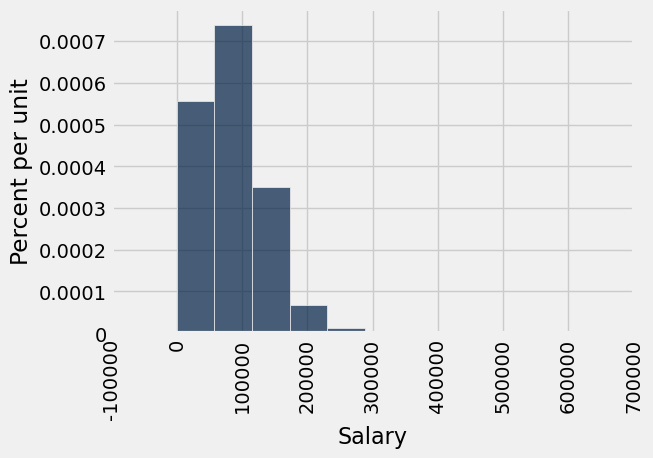

In [47]:
sf_salaries = Table.read_table("san_francisco_2019.csv")
sf_salaries.hist("Salary")

In [49]:
def one_sample_mean(sample_size):
    """Take a sample from the population of salaries and compute its mean"""
    sampled_salaries = sf_salaries.sample(sample_size)
    return np.mean(sampled_salaries.column('Salary'))

In [51]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

Population Average: 80608.7076025


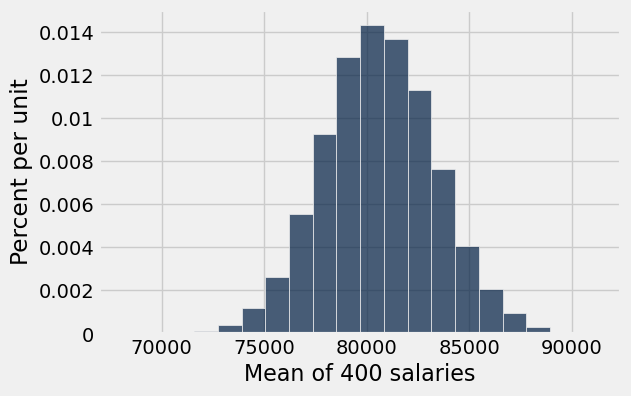

In [53]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 salaries', sample_means_400).hist(bins=20)
print('Population Average:', np.mean(sf_salaries.column("Salary")))

## Distribution of the Sample Average

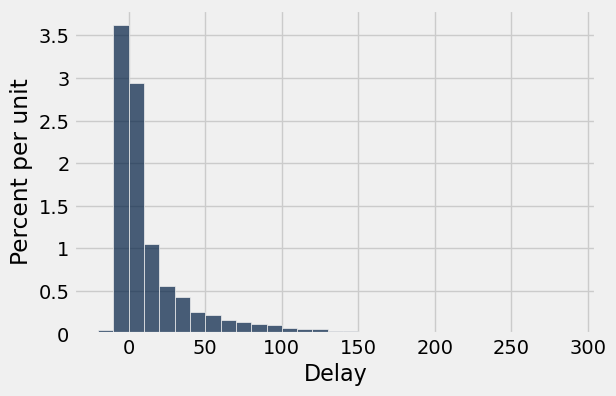

In [3]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [5]:
delays = united.column('Delay')
population_mean = np.mean(delays)
population_sd = np.std(delays)
population_mean, population_sd

(16.658155515370705, 39.480199851609314)

In [7]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [9]:
def ten_thousand_sample_means(sample_size):
    """Approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

Population Average: 16.6581555154


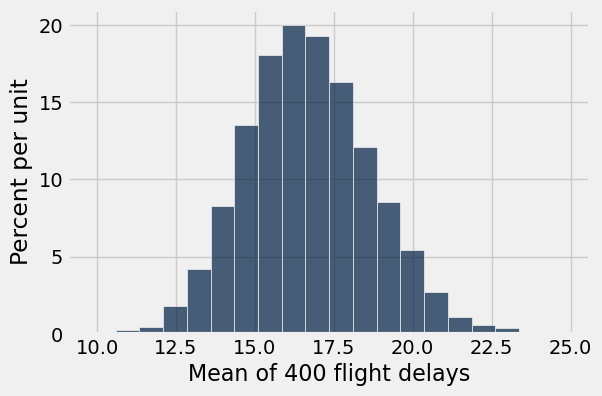

In [11]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', population_mean)

How many possible ways are there that the sample could have come out?

In [13]:
united.num_rows

13825

In [15]:
# How many possible sample means are there?
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

In [17]:
sample_means_900 = ten_thousand_sample_means(900)

In [19]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

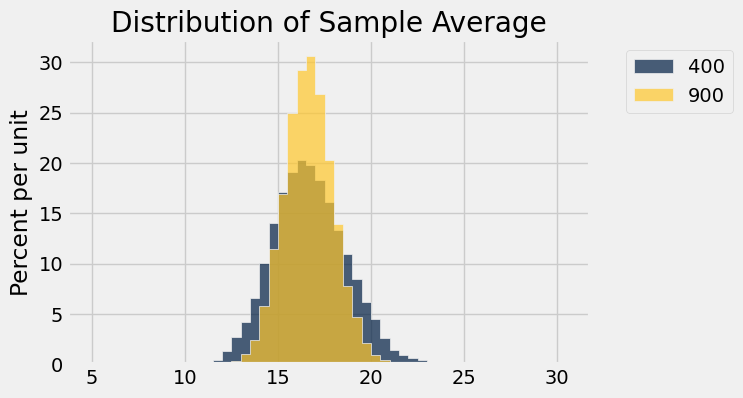

In [21]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

## Variability of the Sample Mean

### Relationship Between Population SD and Sample Size

In [23]:
"""Empirical distribution of random sample means"""
def plot_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", population_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", population_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.705428
Population SD: 39.4801998516
SD of sample means: 3.98486452176


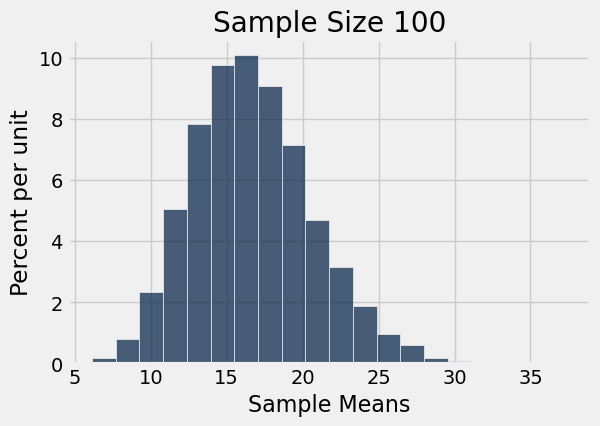

In [25]:
plot_sample_means(100)

In [27]:
39.48 / 3.932

10.040691759918616

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.65604
Population SD: 39.4801998516
SD of sample means: 1.96734439401


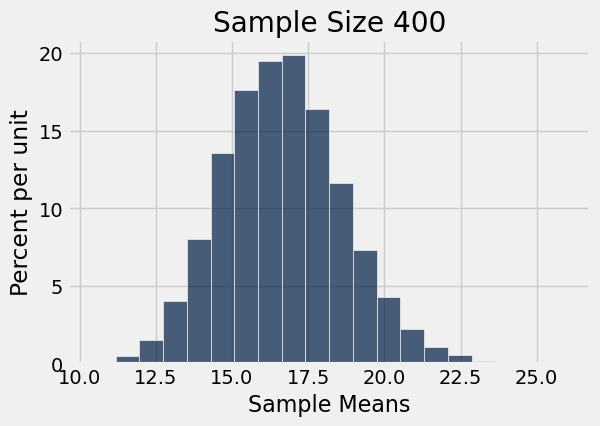

In [29]:
plot_sample_means(400)

In [ ]:
39.48 / 1.973

Sample size:  625
Population mean: 16.6581555154
Average of sample means:  16.647544
Population SD: 39.4801998516
SD of sample means: 1.60071046896


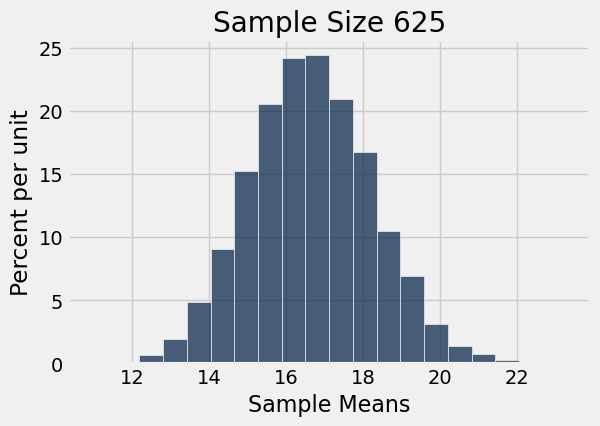

In [31]:
plot_sample_means(625)

In [33]:
39.48 / 1.577

25.034876347495242

In [35]:
39.48 / np.sqrt(100)

3.9479999999999995

In [37]:
39.48 / np.sqrt(400)

1.9739999999999998

In [39]:
39.48 / np.sqrt(625)

1.5791999999999999

In [41]:
# Warning: this cell will take a long time to run!
sample_sizes = np.arange(100, 950, 50)

sample_mean_sds = make_array()
for n in sample_sizes:
    sample_means = ten_thousand_sample_means(n)
    sample_mean_sds = np.append(sample_mean_sds, np.std(sample_means))

In [43]:
sd_table = Table().with_columns(
    'Sample size', sample_sizes,
    'SD of simulated sample means', sample_mean_sds,
    'Pop SD / sqrt(sample size)', population_sd / np.sqrt(sample_sizes),
)
sd_table

Sample size,SD of simulated sample means,Pop SD / sqrt(sample size)
100,3.95827,3.94802
150,3.21932,3.22354
200,2.76264,2.79167
250,2.48078,2.49695
300,2.27001,2.27939
350,2.11241,2.11031
400,1.9822,1.97401
450,1.862,1.86111
500,1.78598,1.76561
550,1.66928,1.68344


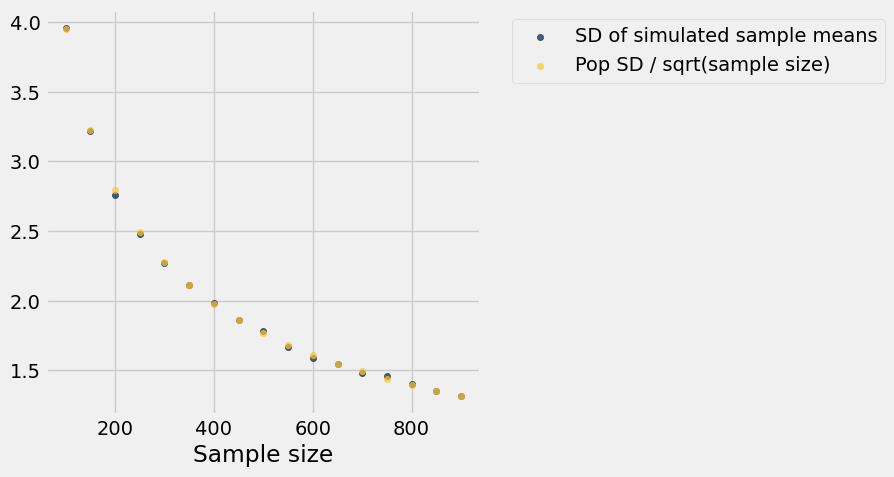

In [45]:
sd_table.scatter('Sample size')